# Forward Propogation

Forward propagation is a fundamental process in neural networks where inputs are processed through the network’s layers to produce an output. 

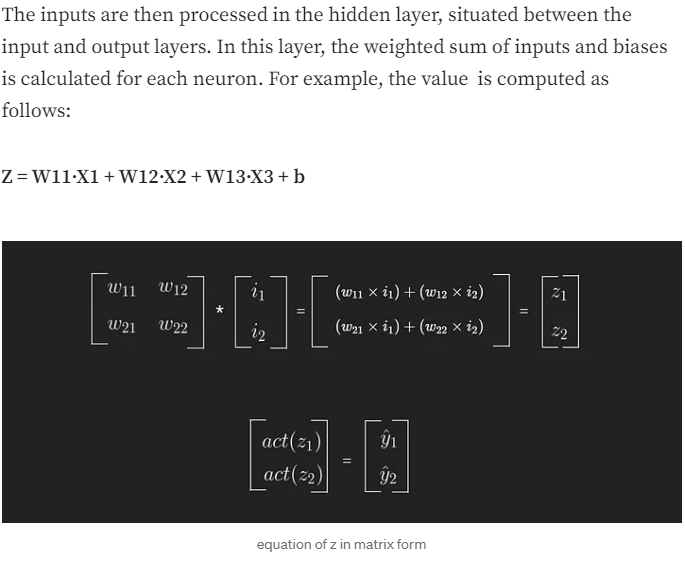

## Activation Function (e.g., ReLU):
Following the weighted sum, an activation function is applied to introduce non-linearity to the network. A common choice is the Rectified Linear Unit (ReLU). The result of the activation function is denoted as σ(z)

ReLU(x)= max(0,x)

## Output Layer:
The processed information is then forwarded to the output layer, where the final output of the neural network is generated. The same process is repeated, with each neuron in the output layer computing its weighted sum and applying an activation function.

## Activation Function in the Output Layer:
The activation function in the output layer depends on the nature of the task. For binary classification problems, a sigmoid function is often used to squash the output values between 0 and 1. For multi-class classification, a softmax function is commonly employed

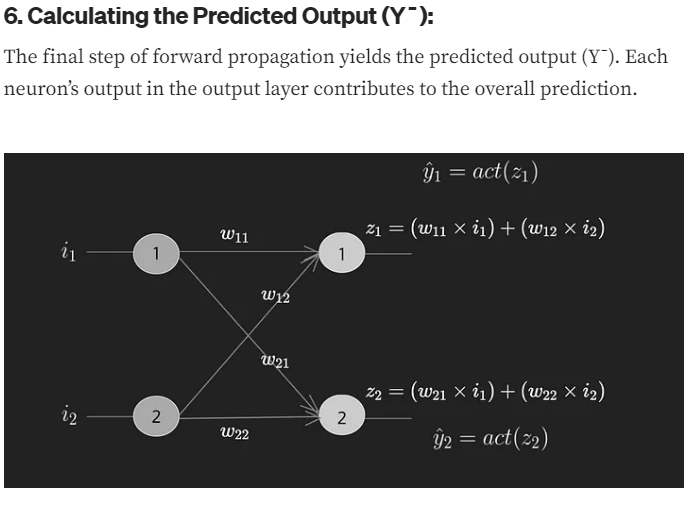

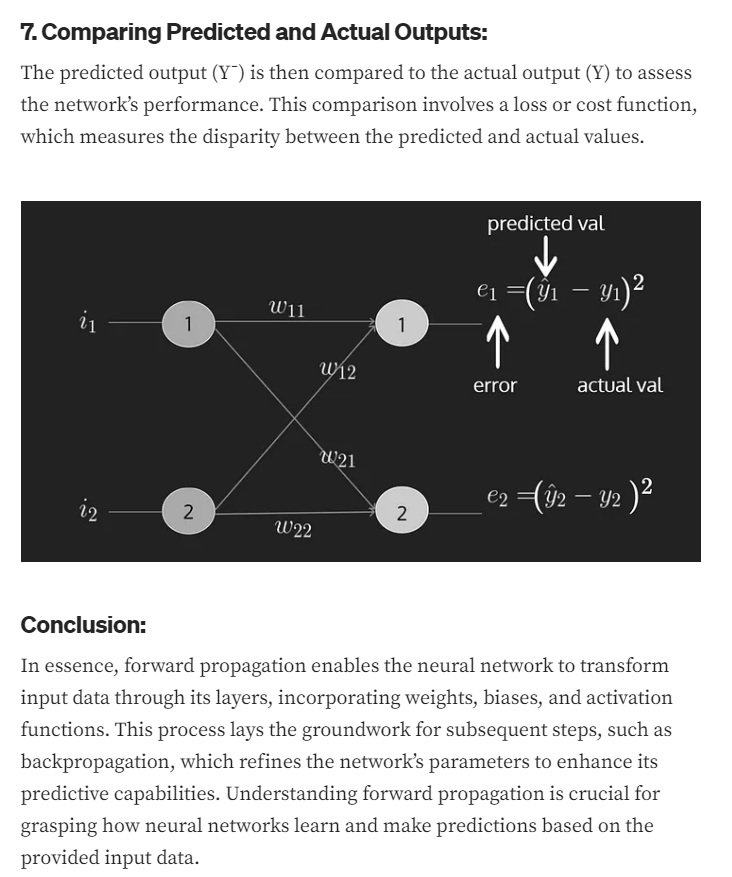

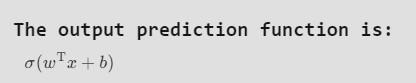

In [15]:
import numpy as np
from numpy.random import rand

In [17]:
#dataset
x = np.array(([0.9,0.8],[0.6,0.3],[0.9,0.1],[0.9,0.8]))  #Features
y = np.array(([0],[1],[1],[0]))  #Labels (0,1)

In [19]:
#Activation Function
def Sigmoid(z):
    return  1/ (1 + np.exp(-z)) # The Sigmoid Function 

In [25]:
# Multi-layers feedforward neural network (2 hidden layers)


class NeuralNetwork:
    # Step one
    def __init__(self,x,y,nodes_first_layer = 6 , nodes_second_layer = 4, nodes_output_layer = 1):
        # Define x,y
        self.inputs_of_layer0 = x
        self.y = y
        
        # Define number of neurns in each layer
        self.nodes_first_layer = nodes_first_layer
        self.nodes_second_layer = nodes_second_layer
        self.nodes_output_layer = nodes_output_layer
        
        #intialize the wieghts (theta) metrices
        
        self.thetas_of_layer0 = np.random.rand(self.inputs_of_layer0.shape[1] + 1, self.nodes_first_layer) #shape: [2+1, 6]
        self.thetas_of_layer1 = np.random.rand(self.nodes_first_layer + 1, self.nodes_second_layer) #shape: [6 + 1, 4]
        self.thetas_of_layer2 = np.random.rand(self.nodes_second_layer + 1,self.nodes_output_layer) #shape: [4 + 1, 1]
        
    # Step Two
    def FeedForward(self):
        
        #compute all the nodes (a1, a2, a3, a4, a5, a6) in layer1
        self.Z1 = self.thetas_of_layer0[0] + np.dot(self.inputs_of_layer0, self.thetas_of_layer0[1:] )
        self.layer1 = Sigmoid(self.Z1)
        
        #compute all the nodes (a1, a2, a3, a4) in layer2
        self.Z2 = self.thetas_of_layer1[0] + np.dot(self.layer1, self.thetas_of_layer1[1:])
        self.layer2 = Sigmoid(self.Z2)
        
        #compute the nodes (a1) in layer3
        self.Z3 = self.thetas_of_layer2[0] + np.dot(self.layer2, self.thetas_of_layer2[1:])
        self.layer3 = Sigmoid(self.Z3) #Output layer
        
        return self.layer3

Explaining the Code above 
Step one
We started by creating the sigmoid function with the help of numpy library.

The next thing we started to create is the model, first we initialized x, y, as well as, the number of neurns in each layer, you could let the user initialize them by themselves, but I did it from the class itself.

The next thing we initalized the number of thetas for each layer, notice that we added one, this is for the bias.

Step two
Now it's time go into the whole process
Z is the function that combines the bias and the thatas multplied by the features, the reason I used this code self.thetas_of_layer0[0] I want the first line of the matrix to be the bias, then I multplied the thetas by its features, we plug Z into the sigmoid function to get a vector has all the probability for each neurn. (The same process for the rest of the layers).

Finally We return the output which is a vector has output for each case of x.

In [30]:
NN = NeuralNetwork(x,y)

predicted_output = NN.FeedForward()
    
print ("Actual Output: \n", y)
print("Predicted Output: \n", predicted_output, "\n")

Actual Output: 
 [[0]
 [1]
 [1]
 [0]]
Predicted Output: 
 [[0.94372686]
 [0.94240135]
 [0.94242846]
 [0.94372686]] 



In [32]:
import numpy as np
import pandas as pd

# Creating a dataset
df = pd.DataFrame([[8, 8, 4], [7, 9, 5], [6, 10, 6], [5, 12, 7]], columns=['cgpa', 'profile_score', 'lpa'])

# Initializing parameters
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for i in range(1, L):
        parameters['W' + str(i)] = np.ones((layer_dims[i-1], layer_dims[i])) * 0.1
        parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))
    return parameters

# Forward propagation
def linear_forward(A_prev, W, b):
    Z = np.dot(W.T, A_prev) + b
    return Z

def relu(Z):
    return np.maximum(0, Z)

def L_layer_forward(X, parameters):
    A = X
    caches = []
    L = len(parameters) // 2
    for i in range(1, L):
        A_prev = A
        W = parameters['W' + str(i)]
        b = parameters['b' + str(i)]
        Z = linear_forward(A_prev, W, b)
        A = relu(Z)
        cache = (A_prev, W, b, Z)
        caches.append(cache)

    # Output layer
    W_out = parameters['W' + str(L)]
    b_out = parameters['b' + str(L)]
    Z_out = linear_forward(A, W_out, b_out)
    AL = Z_out

    return AL, caches

# Example execution
X = df[['cgpa', 'profile_score']].values[0].reshape(2, 1)
parameters = initialize_parameters([2, 2, 1])
y_hat, caches = L_layer_forward(X, parameters)
print("Final output:")
print(y_hat)

Final output:
[[0.32]]
